In [499]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sn

In [494]:
master_data=pd.read_csv('Anketa.csv')
master_data.describe()

,Степень доверия облачным технологиям и хранилищам (хранение и обработка данных осуществляется удаленно)?,[Статья в интернете],[Видео материалы],[Официальная документация],[Задать вопрос коллеге-эксперту],[Workshop],"Насколько Вы удовлетворены Вашим work-life balance (1- совсем нет, 10 - полностью удовлетворен)"
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.00000
mean,7.468750,3.125000,3.218750,3.437500,3.156250,2.062500,6.12500
std,2.243045,1.475608,1.128355,1.479701,1.272776,1.366358,2.16646
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.00000
25%,6.000000,2.000000,2.750000,2.750000,2.000000,1.000000,4.75000
50%,7.500000,3.000000,3.000000,4.000000,3.000000,1.500000,6.50000
75%,9.000000,4.250000,4.000000,5.000000,4.000000,3.000000,8.00000
max,10.000000,5.000000,5.000000,5.000000,5.000000,5.000000,10.00000


In [487]:
master_data

,Отметка времени,Должность,Стаж,CORE Skill,"Отметьте базы данных, с которыми Вам приходилось работать",Основной язык для разработки,Степень доверия облачным технологиям и хранилищам (хранение и обработка данных осуществляется удаленно)?,"Как часто Вы посещаете различные tech talk, meetup, конференции?",Опыт выступления на конференции?,Частота обновления знаний по стеку технологий?,[Статья в интернете],[Видео материалы],[Официальная документация],[Задать вопрос коллеге-эксперту],[Workshop],"Насколько Вы удовлетворены Вашим work-life balance (1- совсем нет, 10 - полностью удовлетворен)"
0,2019/05/22 1:34:19 PM GMT+3,Junior Developer,0-3,QA Engineer,Microsoft SQL Server;MySQL,Java,10,Раз в год,Нет,Только при необходимости,2,4,1,5,3,8
1,2019/05/22 1:36:10 PM GMT+3,Middle Developer,0-3,BI development,Oracle;Microsoft SQL Server;Snowflake;PostgreS...,"Процедурный SQL (plsql, tsql, plpgsql)",8,Не посещаю,Нет,Только при необходимости,3,5,4,2,1,4
2,2019/05/22 1:37:52 PM GMT+3,Junior Developer,0-3,Data Science,Sqlite,Python,7,Раз в год,Да,Изучаю время от времени статьи с интересными д...,2,3,1,4,5,6
3,2019/05/22 1:38:58 PM GMT+3,Middle Developer,0-3,Back-end development,Oracle;Microsoft SQL Server;PostgreSQL;MySQL;M...,Java,9,Не посещаю,Нет,Изучаю время от времени статьи с интересными д...,1,2,4,5,3,6
4,2019/05/22 1:42:27 PM GMT+3,Middle Developer,0-3,Back-end development,PostgreSQL;Redis;Elasticsearch,GO,4,Раз в месяц,Нет,Постоянно,5,4,3,2,1,8
5,2019/05/22 1:43:51 PM GMT+3,Middle Developer,0-3,Back-end development,Oracle;Microsoft SQL Server;MySQL;MongoDB,Java,10,Раз в год,Нет,Изучаю время от времени статьи с интересными д...,4,2,5,3,1,8
6,2019/05/22 1:47:23 PM GMT+3,Junior Developer,0-3,Back-end development,Oracle;PostgreSQL;MySQL,Java,9,Не посещаю,Нет,Изучаю время от времени статьи с интересными д...,4,3,5,2,1,8
7,2019/05/22 1:54:46 PM GMT+3,Junior Developer,0-3,Back-end development,PostgreSQL;MySQL;InfluxDB,Java,7,Не посещаю,Нет,Только при необходимости,5,1,3,4,2,9
8,2019/05/22 1:55:37 PM GMT+3,Junior Developer,0-3,Back-end development,Oracle;Microsoft SQL Server;PostgreSQL;Redis,Python,5,Пока не заставят,Нет,Изучаю время от времени статьи с интересными д...,5,3,4,2,1,5
9,2019/05/22 1:56:20 PM GMT+3,Middle Developer,0-3,Data Science,PostgreSQL;MySQL;MongoDB;Cassandra,Python,6,Раз в месяц,Нет,Когда выходит новый инструмент/сервис/технолог...,4,5,2,3,1,7


In [495]:
master_data['Должность'].nunique()
master_data.groupby('Должность')['Отметка времени'].nunique()

Должность
Junior Developer    10
Lead Developer       2
Middle Developer    14
Senior Developer     6
Name: Отметка времени, dtype: int64

In [496]:
dt = master_data.iloc[:, 10:15]
dt
# ['[Статья в интернете]','[Видео материалы]']#,'[Официальная документация]','[Задать вопрос коллеге-эксперту]','[Workshop]']

,[Статья в интернете],[Видео материалы],[Официальная документация],[Задать вопрос коллеге-эксперту],[Workshop]
0,2,4,1,5,3
1,3,5,4,2,1
2,2,3,1,4,5
3,1,2,4,5,3
4,5,4,3,2,1
5,4,2,5,3,1
6,4,3,5,2,1
7,5,1,3,4,2
8,5,3,4,2,1
9,4,5,2,3,1


In [506]:
def euclidean(X):
    eucl = np.zeros((len(X),len(X)))
    for i in range(1,len(X)):
        for j in range(0,i):
            eucl[i,j] = (sum((X[i,]-X[j,])**2))**0.5
            eucl[j,i] = eucl[i,j]
    
    return eucl

In [515]:
def manhettan(X):
    mahet = np.zeros((len(X),len(X)))
    for i in range(0,len(X)):
        for j in range(0,i):
            mahet[i,j] = sum(abs(X[i,]-X[j,]))
            mahet[j,i] = mahet[i,j]
    return mahet

In [513]:
def chebyshev(X):
    cheb = np.zeros((len(X),len(X)))
    for i in range(0,len(X)):
        for j in range(0,i):
            cheb[i,j] = max(abs(X[i,]-X[j,]))
            cheb[j,i] = cheb[i,j]
    return cheb


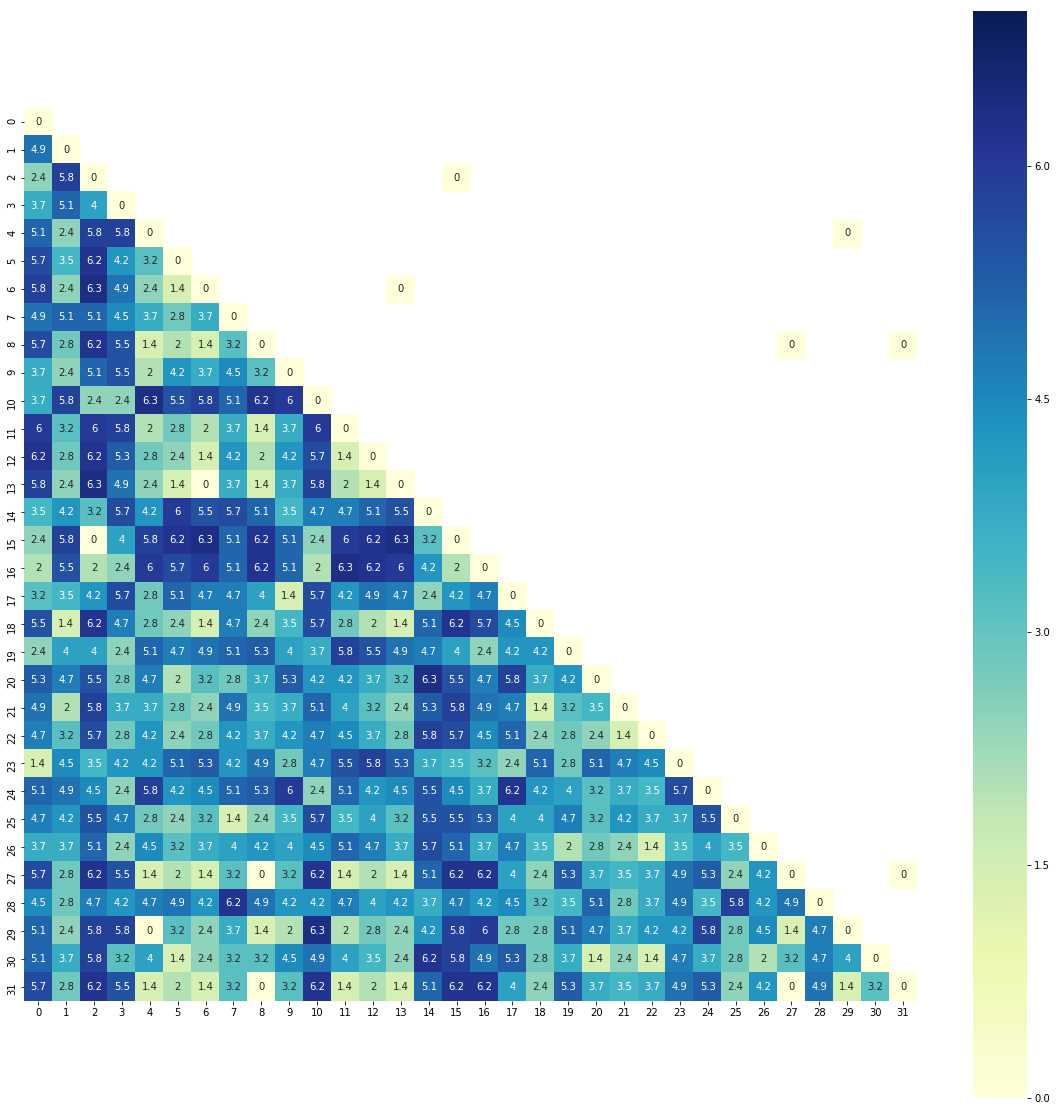

In [508]:
mask = (euclidean(dt.values))
mask[np.tril_indices_from(mask)] = False
fig,ax = plt.subplots()
fig.set_size_inches(20,20)
sn.heatmap(euclidean(dt.values), mask=mask, vmax=7, square=True, annot = True, cmap="YlGnBu")

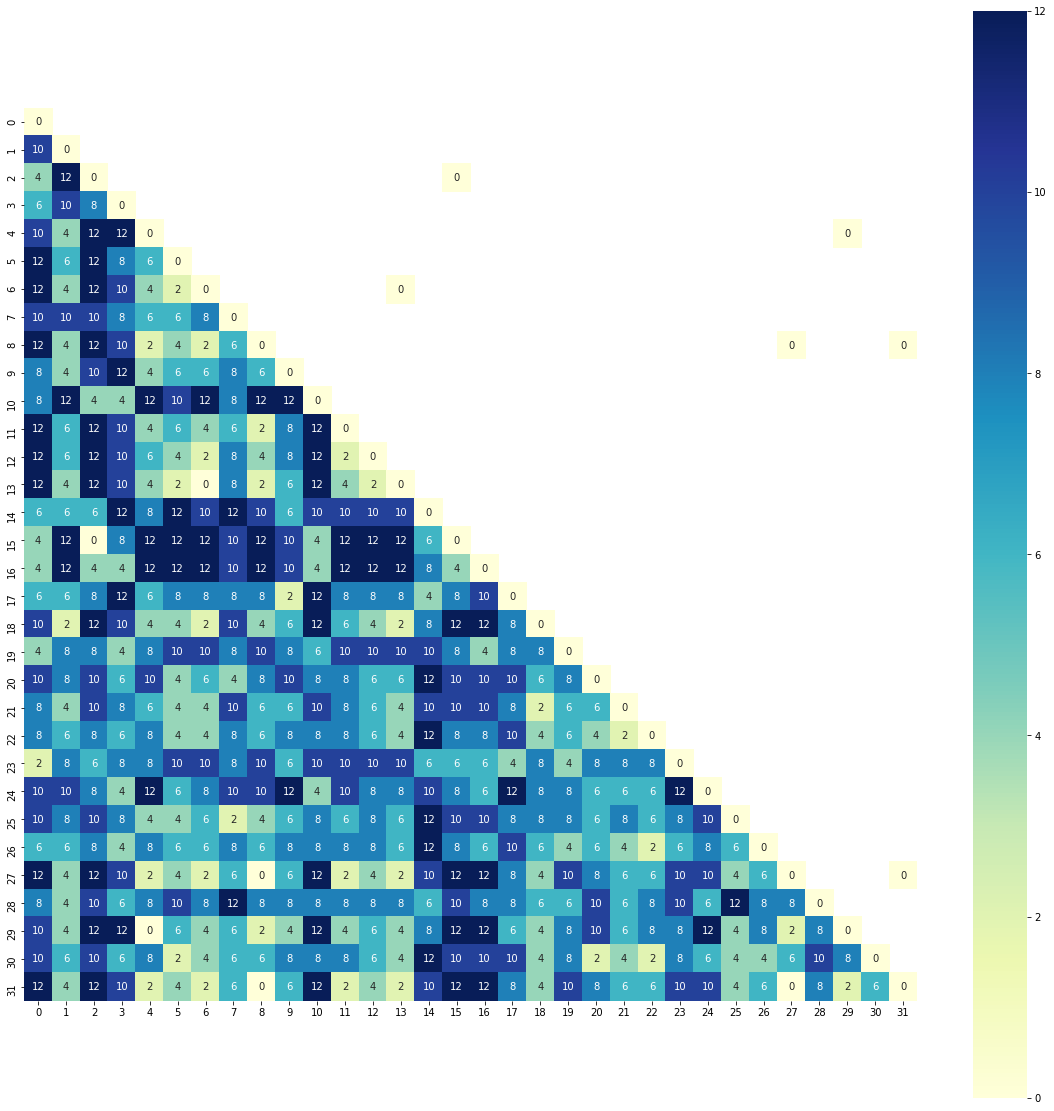

In [517]:
mask = (manhettan(dt.values))
mask[np.tril_indices_from(mask)] = False
fig,ax = plt.subplots()
fig.set_size_inches(20,20)
sn.heatmap(manhettan(dt.values), mask=mask, vmax=12, square=True, annot = True, cmap="YlGnBu")

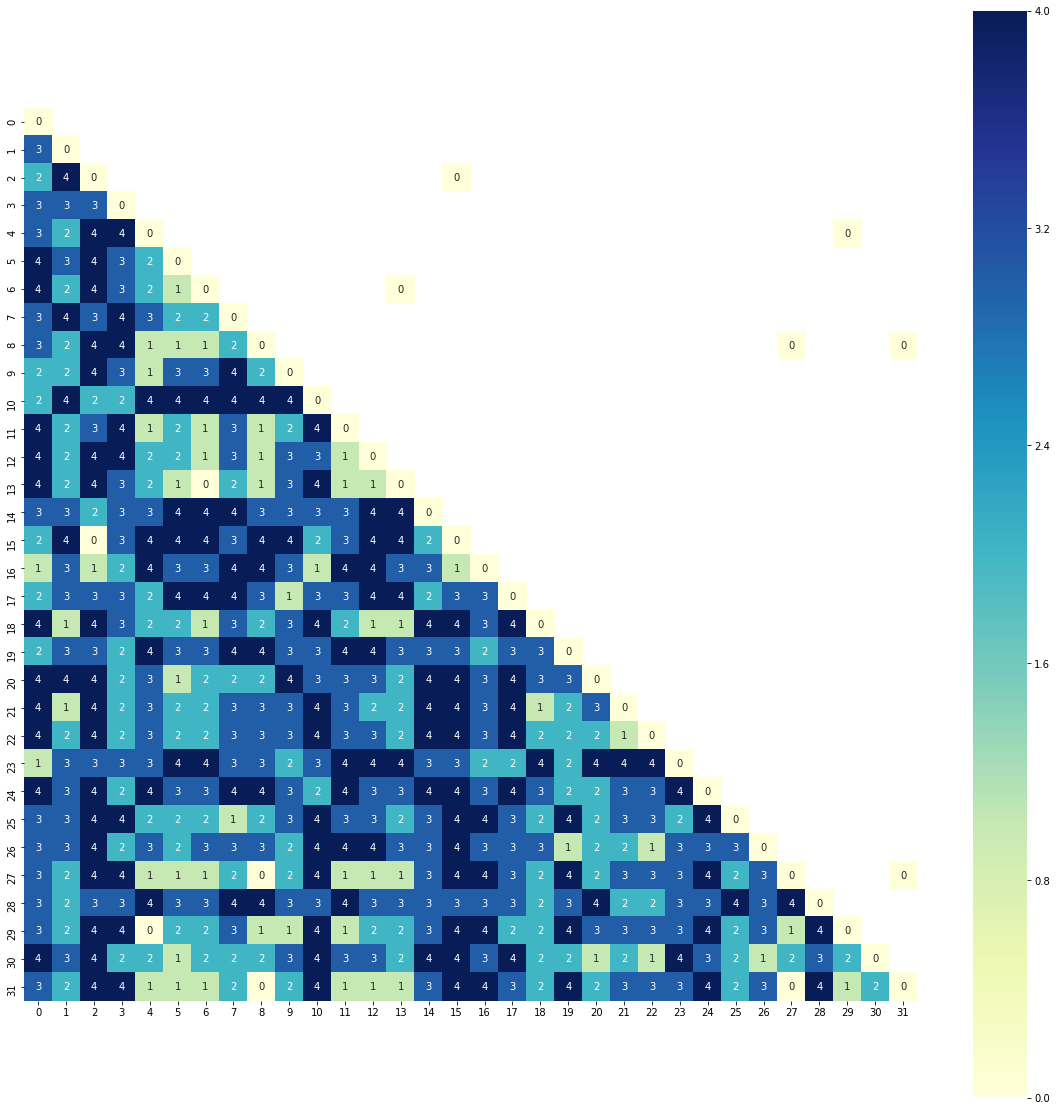

In [519]:
mask = (chebyshev(dt.values))
mask[np.tril_indices_from(mask)] = False
fig,ax = plt.subplots()
fig.set_size_inches(20,20)
sn.heatmap(chebyshev(dt.values), mask=mask, vmax=4, square=True, annot = True, cmap="YlGnBu")

In [485]:
eucll = pd.DataFrame(euclidean(dt.values))
manhet = pd.DataFrame(manhettan(dt.values))
cheb = pd.DataFrame(chebyshev(dt.values))
# print(eucll.head())
# eucll.to_csv('eucl.csv',mode='a')
# print(manhet.head())
manhet.to_csv('manhet.csv',mode='a')
# print(cheb.head())
cheb.to_csv('cheb.csv',mode='a')

In [284]:
X = dt.values
n = (len(X))
M =[]
D  =  np.zeros((len(X),len(X)))
for i in range(0,n-1):
    for j in range(0,i):
        D[i,j] =  sum(abs(dt.values[i] - dt.values[j]))
        D[j,i] = D[i,j]
print((D))
for k in range(0,len(D)-1):
    M.append(sum(D[k]))

# print('M',min(M), 'alfa',dt.values[M.index(min(M)),])
print(len(M))
print(M)
kk =  min(M)
# print(kk,'sw',M.index(kk))
kk = np.where(M == min(M))
# print(kk)
R  = dt.values[kk]

print(R)

[[ 0. 10.  4. ... 10. 10.  0.]
 [10.  0. 12. ...  4.  6.  0.]
 [ 4. 12.  0. ... 12. 10.  0.]
 ...
 [10.  4. 12. ...  0.  8.  0.]
 [10.  6. 10. ...  8.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]]
31
[256.0, 206.0, 274.0, 246.0, 210.0, 202.0, 194.0, 240.0, 200.0, 222.0, 274.0, 226.0, 220.0, 194.0, 274.0, 274.0, 268.0, 240.0, 196.0, 228.0, 226.0, 196.0, 192.0, 236.0, 254.0, 214.0, 200.0, 200.0, 244.0, 210.0, 200.0]
[[2 3 5 4 1]]


In [391]:
S = (dt.values.sum(axis=0))
# print(S)
S2 = S**2
S_sum = sum(S)
S2_sum = sum(S2)
n = len(dt.values)
k = len(dt.columns)
SS = S2_sum - S_sum**2/k
W  = (12*SS)/(n**2*(k**3 - k))
W

0.1158203125

In [493]:
# Сравним 11 и 20 экспертов

expert_11 = dt.values[1]
expert_20 = dt.values[10]
expert = pd.DataFrame(columns = list(['q1','q2','q3','q4','q5']))
# expert = expert.append(expert_20)
expert.loc[0] = list(expert_11 )
expert.loc[1] = list(expert_20 )
expert.columns =expert.columns.str.strip()

expert = expert.T
expert_sort = expert.sort_values(by=expert.columns[0], inplace=True)  
expert_sort = (expert.T).copy()

P = []
Q = []
print(k)
for i in range(0,k-1):
    P.append(len(np.argwhere(expert_sort.values[1,i+1:k] > expert_sort.values[1,i])))
#     print('expert_sort.values[1,i+1:k] = ',expert_sort.values[1,i+1:k],'expert_sort.values[1,i]',expert_sort.values[1,i],'p', P)
    Q.append(len(np.argwhere(expert_sort.values[1,i+1:k] < expert_sort.values[1,i])))
#     print('q', Q)
P_sum = sum(P)
# print(P_sum)
Q_sum = sum(Q)
S_PQ = P_sum - Q_sum
Kendall = 2*S_PQ/(k*(k-1))
print('Kenadll' , Kendall)


# КРК Спирмана
Spearman = 1 - (6*sum((expert.values[0,] - expert.values[1,])**2))/(k*(k**2-1))
print('Spearman', Spearman)



# # 9. Выделите наиболее несогласованных экспертов.
# # Построим матрицу парных сравнений экспертов на основе коэффициентов Кендалла и Спирмена


5
Kenadll -0.6
Spearman 0.9


In [473]:
X = dt.values
Kendall_all = np.zeros((len(X),len(X)))
# most_agreed_K = np.matrix(3)
# least_agreed_K = np.matrix(3)
      # Kendall_max = 0
      # Kendall_min = 1
Kendall_max = 0.9
Kendall_min = 0.1
tt_1 = 0 
tt_2 = 0
most_agreed_K = pd.DataFrame(columns=list(['i', 'j', 'Kendall_all']))
least_agreed_K = pd.DataFrame(columns=list(['i', 'j', 'Kendall_all']))
# least_agreed_K = pd.DataFrame(columns = list(['q1','q2','q3','q4','q5']))             
for i in range(0,n): 
    for j in range(0,i) :
        expert = pd.DataFrame(columns = list(['q1','q2','q3','q4','q5']))
        # expert = expert.append(expert_20)
        expert.loc[0] = list(dt.values[i,])
        expert.loc[1] = list(dt.values[j,])
        expert.columns =expert.columns.str.strip()

        expert = expert.T
        expert_sort = expert.sort_values(by=expert.columns[0], inplace=True)  
        expert_sort = (expert.T).copy()
       
        P = []
        Q = []
        for u in range(0,k):
            P.append(len(np.argwhere(expert_sort.values[1,u:k] > expert_sort.values[1,u])))
            Q.append(len(np.argwhere(expert_sort.values[1,u:k] < expert_sort.values[1,u])))
    
        Kendall_all[i,j] = 2*(sum(P)-sum(Q))/(k*(k-1))
        if (i!=j):
            if (Kendall_all[i,j] >= Kendall_max):
                most_agreed_K.loc[tt_1] =list([j,i, Kendall_all[i, j]])
                tt_1 = tt_1+1

    
        if (i!=j):
            if (Kendall_all[i,j] <= Kendall_min):
#                 print(j,i,Kendall_all[i, j])
                least_agreed_K.loc[tt_2] = list([j,i, Kendall_all[i, j]])
                tt_2=tt_2+1
    
most_agreed_K = most_agreed_K[1:].copy()
least_agreed_K = least_agreed_K[1:].copy()
  # most_agreed_K = most_agreed_K[which(most_agreed_K[,3] == max(most_agreed_K[,3])),]
  # least_agreed_K = least_agreed_K[which(least_agreed_K[,3] == min(least_agreed_K[,3])),]
print(Kendall_all)  
print('agreed', most_agreed_K)
print('no agreed',least_agreed_K)

[[ 0.   0.   0.  ...  0.   0.   0. ]
 [-0.2  0.   0.  ...  0.   0.   0. ]
 [ 0.6 -0.6  0.  ...  0.   0.   0. ]
 ...
 [-0.2  0.6 -0.6 ...  0.   0.   0. ]
 [-0.2  0.2 -0.6 ...  0.2  0.   0. ]
 [-0.4  0.4 -0.8 ...  0.8  0.4  0. ]]
agreed       i     j  Kendall_all
1   2.0  15.0          1.0
2   8.0  27.0          1.0
3   4.0  29.0          1.0
4   8.0  31.0          1.0
5  27.0  31.0          1.0
no agreed         i     j  Kendall_all
1     1.0   2.0         -0.6
2     1.0   3.0         -0.2
3     0.0   4.0         -0.2
4     2.0   4.0         -0.6
5     3.0   4.0         -0.6
6     0.0   5.0         -0.4
7     2.0   5.0         -0.8
8     3.0   5.0          0.0
9     0.0   6.0         -0.6
10    2.0   6.0         -1.0
11    3.0   6.0         -0.2
12    0.0   7.0         -0.2
13    1.0   7.0         -0.2
14    2.0   7.0         -0.2
15    0.0   8.0         -0.4
16    2.0   8.0         -0.8
17    3.0   8.0         -0.4
18    2.0   9.0         -0.2
19    3.0   9.0         -0.2
20    5.0   9

In [476]:
Spearman_all = np.zeros((len(X),len(X)))
most_agreed_S = pd.DataFrame(columns=list(['i', 'j', 'Sperman_all']))
least_agreed_S = pd.DataFrame(columns=list(['i', 'j', 'Sperman_all']))
Spearman_max = 0.96
Spearman_min = 0.25
tt_1 = 0 
tt_2 = 0
for i in range(0,n):
    for j in range(0,i):
        expert = pd.DataFrame(columns = list(['q1','q2','q3','q4','q5']))
        # expert = expert.append(expert_20)
        expert.loc[0] = list(dt.values[i,])
        expert.loc[1] = list(dt.values[j,])
        Spearman_all[i,j] = 1 - (6*sum((expert.values[0,] - expert.values[1,])**2))/(k*(k**2-1))
        if (i!=j): 
            if (Spearman_all[i,j] >= Spearman_max):
                most_agreed_S.loc[tt_1] =list([j,i, Spearman_all[i, j]])
                tt_1 = tt_1+1
#                 most_agreed_S = rbind(most_agreed_S, c(j,i, Spearman_all[i, j]))
    
        if (i!=j):
            if (Spearman_all[i,j] <= Spearman_min):
#                 least_agreed_S = rbind(least_agreed_S, c(j,i, Spearman_all[i, j]))
                least_agreed_S.loc[tt_2] = list([j,i, Spearman_all[i, j]])
                tt_2=tt_2+1
                
most_agreed_S = most_agreed_S[1:]
least_agreed_S = least_agreed_S[1:]
  # most_agreed_S = most_agreed_S[which(most_agreed_S[,3] == max(most_agreed_S[,3])),]
  # least_agreed_S = least_agreed_S[which(least_agreed_S[,3] == min(least_agreed_S[,3])),]

print(Spearman_all)
print(most_agreed_S)
print(least_agreed_S)

[[ 0.   0.   0.  ...  0.   0.   0. ]
 [-0.2  0.   0.  ...  0.   0.   0. ]
 [ 0.7 -0.7  0.  ...  0.   0.   0. ]
 ...
 [-0.3  0.7 -0.7 ...  0.   0.   0. ]
 [-0.3  0.3 -0.7 ...  0.2  0.   0. ]
 [-0.6  0.6 -0.9 ...  0.9  0.5  0. ]]
      i     j  Sperman_all
1   2.0  15.0          1.0
2   8.0  27.0          1.0
3   4.0  29.0          1.0
4   8.0  31.0          1.0
5  27.0  31.0          1.0
        i     j  Sperman_all
1     1.0   2.0         -0.7
2     1.0   3.0         -0.3
3     2.0   3.0          0.2
4     0.0   4.0         -0.3
5     2.0   4.0         -0.7
6     3.0   4.0         -0.7
7     0.0   5.0         -0.6
8     2.0   5.0         -0.9
9     3.0   5.0          0.1
10    0.0   6.0         -0.7
11    2.0   6.0         -1.0
12    3.0   6.0         -0.2
13    0.0   7.0         -0.2
14    1.0   7.0         -0.3
15    2.0   7.0         -0.3
16    3.0   7.0          0.0
17    0.0   8.0         -0.6
18    2.0   8.0         -0.9
19    3.0   8.0         -0.5
20    2.0   9.0         -0.3
2

In [464]:
ttttt = ['3','4','33','k3']
print(ttttt[1:])

['4', '33', 'k3']


In [395]:
import scipy.stats as stats
x1 = expert_11 
x2 =expert_20
tau, p_value = stats.kendalltau(x1, x2)
tau

0.6